# Chapter 2 : Monte Carlo Method

## Example 2.1 Area of an Irregular Figure  

Steps:  
1. Draw a shape within the given shape  
2. 



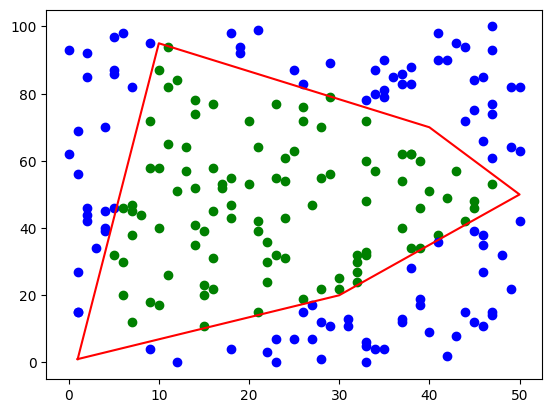

Points within the Area :  98
Actual Area            :  2502.5
Predicted Area         :  2450.0


In [7]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

x_point = []
y_point = []

coords = [(1, 1), (10, 95), (40, 70), (50, 50),(30,20)]
map = Polygon(coords)

for i in coords:
    a = i[0]
    b = i[1]
    x_point.append(a)
    y_point.append(b)
x_point.append(x_point[0])
y_point.append(y_point[0])
plt.plot(x_point,y_point,color="red")

n=0
m=0

for i in range(200):
    x = random.randint(0,50)
    y = random.randint(0,100)
    point = Point(x,y)
    n+=1
    if(map.contains(point)):
        m+=1
        plt.scatter(x,y,color = "green")
    else:
        plt.scatter(x,y,color = "blue")

plt.show()
print("Points within the Area : ", m)
print("Actual Area            : ", map.area)
print("Predicted Area         : ", (m/n)*(100*50))

## Example 2.2 A Gambling Game  

Steps:  
1. 

In [13]:
import random
import numpy as np
import pandas as pd

random_numbers = [5, 9, 3, 6, 4, 8, 6, 8, 1, 5, 2, 4, 0, 6, 3, 1 ] # till game 2

total_cost = 0
total_income = 0

for game in range(100):
    # print(f"Game No. {game}:")
    # random_numbers_i = []
    # h_t = []
    # heads_count = []
    # tails_count = []
    # difference = []


    x = 0
    h = 0
    t = 0
    while(1):
        x += 1
        total_cost += 1
        r = random.randint(0,9)
        if (r < 5):
            h += 1
            # h_t.append('H')
        else:
            t += 1
            # h_t.append('T')
        dif = abs(h-t)
        # difference.append(dif)

        if(dif >= 3):
            # df = pd.DataFrame({
            #     "Random Number" : random_numbers_i,
            #     "Head or Tail" : h_t,
            #     "Heads" : heads_count,
            #     "Tails" : tails_count,
            #     "Difference" : difference
            # })
            print("won 8 dollar cost ",x,"dollar")
            total_income += 8
            break
print('Total Cost ',total_cost," Total Income ",total_income)

won 8 dollar cost  21 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  3 dollar
won 8 dollar cost  27 dollar
won 8 dollar cost  3 dollar
won 8 dollar cost  13 dollar
won 8 dollar cost  9 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  9 dollar
won 8 dollar cost  7 dollar
won 8 dollar cost  13 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  9 dollar
won 8 dollar cost  15 dollar
won 8 dollar cost  3 dollar
won 8 dollar cost  13 dollar
won 8 dollar cost  7 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  13 dollar
won 8 dollar cost  3 dollar
won 8 dollar cost  11 dollar
won 8 dollar cost  9 dollar
won 8 dollar cost  3 dollar
won 8 dollar cost  15 dollar
won 8 dollar cost  23 dollar
won 8 dollar cost  3 dollar
won 8 dollar cost  27 dollar
won 8 dollar cost  23 dollar
won 8 dollar cost  5 dollar
won 8 dollar cost  19 dollar
won 8 dollar cost  11 dollar
won 8 dollar cost  11 dollar
won 8

## Example 2.3 Numerical Integration by Monte Carlo Method  

Steps:  
1. Take the equation  
2. Calculate the actual area  
3. Calculating with random numbers
4. Evaluate

In [15]:
# importing packages
import pandas as pd
from tabulate import tabulate
import sympy as sy

# existing random numbers
random_numbers_x = [22, 25, 18, 45, 25, 27, 48, 43, 40, 47, 38, 33, 24, 47, 42, 25, 33, 50, 34, 21]
random_numbers_y = [.57, .18, .00, .90, .05, .77, .66, .10, .76, .42, .78, .88, .03, .09, .77, .61, .27, .60, .29, .40]

# setting variables
A = 140 * 3 # 420 ## our experiment area
M = 0
N = 0
totalN = 20

# setting data arrays
x_values = [0] * totalN
y_values = [0] * totalN
f_x_values = [0] * totalN
M_values = [0] * totalN
N_values = [0] * totalN

# defining the equation
def f(x):
  return x*x*x

# calculating the actual value
b = 5
a = 2
x = sy.Symbol("x")
result = sy.integrate(f(x), (x, a, b))

# calculating
for i in range (totalN):
  x = random_numbers_x[i] / 10
  y = random_numbers_y[i] * 140
  f_x = f(x)
  if (y <= f_x):
    M += 1
  N += 1

  # inserting data into array
  x_values[i] = x
  y_values[i] = y
  f_x_values[i] = f_x
  M_values[i] = M
  N_values[i] = N

# building pandas DataFrame
df = pd.DataFrame({
  "Random Number (x)" : random_numbers_x,
  "x (0.1 * r)" : x_values,
  "Random Number (y)" : random_numbers_y,
  "y (140 * r)" : y_values,
  "x^3" : f_x_values,
  "M" : M_values,
  "N" : N_values
})

# tabulating from pandas DataFrame
table = tabulate(
  df,
  headers='keys',
  tablefmt='pipe'
)

# showing table
print(table)

# calculating and printing results
I = (M / N) * A
print(f"\nCalculated value of integral = {I:.2f} \nActual value of integral = {result:.2f} \nError = {(abs(I-result) / result) * 100:.2f} %")


|    |   Random Number (x) |   x (0.1 * r) |   Random Number (y) |   y (140 * r) |     x^3 |   M |   N |
|---:|--------------------:|--------------:|--------------------:|--------------:|--------:|----:|----:|
|  0 |                  22 |           2.2 |                0.57 |          79.8 |  10.648 |   0 |   1 |
|  1 |                  25 |           2.5 |                0.18 |          25.2 |  15.625 |   0 |   2 |
|  2 |                  18 |           1.8 |                0    |           0   |   5.832 |   1 |   3 |
|  3 |                  45 |           4.5 |                0.9  |         126   |  91.125 |   1 |   4 |
|  4 |                  25 |           2.5 |                0.05 |           7   |  15.625 |   2 |   5 |
|  5 |                  27 |           2.7 |                0.77 |         107.8 |  19.683 |   2 |   6 |
|  6 |                  48 |           4.8 |                0.66 |          92.4 | 110.592 |   3 |   7 |
|  7 |                  43 |           4.3 |           

## Example 2.4 Determination of value of π by Monte Carlo Method  

Steps:  
1. 

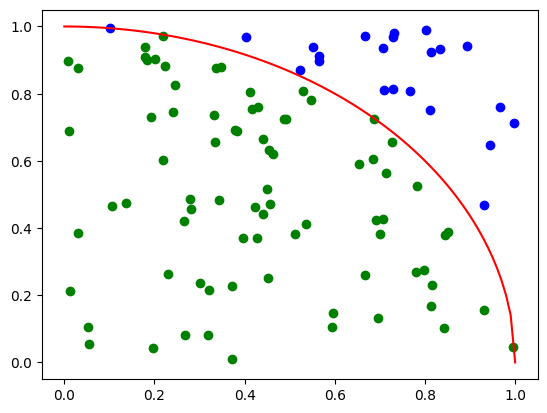

In [16]:
import math
import random
import matplotlib.pyplot as plt

def func(x):
    val = 1-(x**2)
    val = math.sqrt(val)
    return val

m = 0
n = 0

for i in range(100):
    rx = random.randint(0,1000)
    rx = rx/1000
    ry = random.randint(0,1000)
    ry = ry/1000
    n+=1

    if ry <= func(rx):
        m+=1
        plt.scatter(rx,ry,color = "green")
    else:
        plt.scatter(rx,ry,color = "blue")

x = []
y = []
i=0
h=0.01
while i<=1:
    x.append(i)
    y.append(round(func(i),5))
    i+=h
    i = round(i, 2)
plt.plot(x,y,color = "red")
plt.show()

## Example 2.5 Random Walk Problem  

Steps:  
1. 

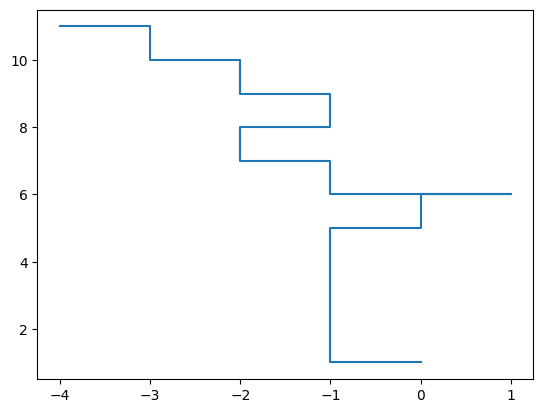

In [4]:
import math
import random
import matplotlib.pyplot as plt

for asa in range(1):
    step = 0
    x = 0
    y = 0
    dotx = []
    doty = []
    direction = []

    F_L_R = [0.5, 0.2, 0.2, 0.1]
    F_L_R = [int(10 * i) for i in F_L_R]

    while step <= 20:

        rn = random.randint(0, 9)

        if rn in range(F_L_R[0]):
            direction.append('F')
            y += 1
            dotx.append(x)
            doty.append(y)
        elif rn in range(F_L_R[0], F_L_R[0] + F_L_R[1]):
            direction.append('L')
            x -= 1
            dotx.append(x)
            doty.append(y)
        elif rn in range(F_L_R[1],F_L_R[0]+ F_L_R[1]+F_L_R[2]):
            direction.append('R')
            x += 1
            dotx.append(x)
            doty.append(y)
        else:
            y -= 1
            direction.append('B')
            dotx.append(x)
            doty.append(y)
        step += 1
    plt.plot(dotx, doty)
plt.show()

## Example 2.6 Reliability Problem  

Steps:  
1. Generate Random Digits according to the probability (in this case we would just use the given Random Digits)  
2. Assign Random Digits to probabilistic values table  
2.1 for Brearing Life  
2.2 for Repairman's delay  
3. Calculate the simulation table  
4. Calculate the final part  

In [96]:
# importing packages
import pandas as pd
from tabulate import tabulate

# defining Random Digits
random_digits_bearing_1_life = [25, 82, 16, 14, 82, 45, 81, 80, 97, 62, 30, 31, 80, 72, 63, 59, 9, 25, 70, 64, 61, 92, 12]
random_digits_bearing_2_life = [65, 91, 30, 66, 32, 29, 11, 43, 40, 65, 82, 73, 15, 70, 65, 33, 54, 87, 27, 37, 99, 94, 12]
random_digits_bearing_3_life = [94, 87, 63, 66, 30, 69, 37, 1, 66, 51, 92, 36, 47, 80, 94, 31, 7, 9, 19, 29, 29, 94, 87]

random_digits_bearing_1_repairman_delay = [9, 8, 0, 5, 2, 3, 7, 3, 7, 4, 9, 5, 6, 7, 6, 0, 2, 3, 9, 8, 3, 3, 2]
random_digits_bearing_2_repairman_delay = [5, 0, 5, 6, 5, 3, 2, 8, 0, 8, 2, 4, 4, 6, 9, 9, 5, 7, 7, 4, 8, 4, 4]
random_digits_bearing_3_repairman_delay = [7, 0, 6, 2, 2, 7, 2, 8, 8, 3, 8, 3, 7, 0, 4, 7, 1, 6, 2, 3, 2, 5, 6]

# defining other variables
iter = 23
operation_runtime = 0
operation_simulation_time = 30000 + 1000
bearing_1_life_record = [0] * iter
bearing_2_life_record = [0] * iter
bearing_3_life_record = [0] * iter
bearing_1_clock = 0
bearing_2_clock = 0
bearing_3_clock = 0
bearing_1_clock_record = [0] * iter
bearing_2_clock_record = [0] * iter
bearing_3_clock_record = [0] * iter
bearing_1_delay = 0
bearing_2_delay = 0
bearing_3_delay = 0
bearing_1_delay_record = [0] * iter
bearing_2_delay_record = [0] * iter
bearing_3_delay_record = [0] * iter

bearing_1_delay_count = 0
bearing_2_delay_count = 0
bearing_3_delay_count = 0


# defining bearing life calculation (runtime)
def calc_bearing_time(random_digit):
  bearing_life = 0
  if (random_digit >= 1 and random_digit <= 10):
    bearing_life = 1000
  elif (random_digit >= 11 and random_digit <= 24):
    bearing_life = 1100
  elif (random_digit >= 25 and random_digit <= 48):
    bearing_life = 1200
  elif (random_digit >= 49 and random_digit <= 62):
    bearing_life = 1300
  elif (random_digit >= 63 and random_digit <= 74):
    bearing_life = 1400
  elif (random_digit >= 75 and random_digit <= 84):
    bearing_life = 1500
  elif (random_digit >= 85 and random_digit <= 90):
    bearing_life = 1600
  elif (random_digit >= 91 and random_digit <= 95):
    bearing_life = 1700
  elif (random_digit >= 96 and random_digit <= 98):
    bearing_life = 1800
  elif (random_digit == 99 or random_digit == 00):
    bearing_life = 1900
  
  return bearing_life

# defining repairman delay time
def calc_delay_time(random_digit):
  delay_time = 0
  if (random_digit >= 1 and random_digit <= 3):
    delay_time = 4
  elif (random_digit >= 4 and random_digit <= 9):
    delay_time = 6
  elif (random_digit == 0):
    delay_time = 8
  
  return delay_time


i = 0  # variable to iterate random numbers

# calculating 
while (operation_runtime <= operation_simulation_time and i < 23):

  bearing_1_life = calc_bearing_time(random_digits_bearing_1_life[i])
  if (i == 0):
    bearing_1_clock = bearing_1_life
  else:
    bearing_1_clock += bearing_1_life
  bearing_1_delay = calc_delay_time(random_digits_bearing_1_repairman_delay[i])
  bearing_1_delay_count += bearing_1_delay

  bearing_2_life = calc_bearing_time(random_digits_bearing_2_life[i])
  if (i == 0):
    bearing_2_clock = bearing_2_life
  else:
    bearing_2_clock += bearing_2_life
  bearing_2_delay = calc_delay_time(random_digits_bearing_2_repairman_delay[i])
  bearing_2_delay_count += bearing_2_delay
  
  bearing_3_life = calc_bearing_time(random_digits_bearing_3_life[i])
  if (i == 0):
    bearing_3_clock = bearing_3_life
  else:
    bearing_3_clock += bearing_3_life
  bearing_3_delay = calc_delay_time(random_digits_bearing_3_repairman_delay[i])
  bearing_3_delay_count += bearing_3_delay

  # recording values
  bearing_1_clock_record[i] = bearing_1_clock
  bearing_1_life_record[i] = bearing_1_life
  bearing_1_delay_record[i] = bearing_1_delay

  bearing_2_clock_record[i] = bearing_2_clock
  bearing_2_life_record[i] = bearing_2_life
  bearing_2_delay_record[i] = bearing_2_delay

  bearing_3_clock_record[i] = bearing_3_clock
  bearing_3_life_record[i] = bearing_3_life
  bearing_3_delay_record[i] = bearing_3_delay

  operation_runtime_i = min(bearing_1_life, bearing_2_life, bearing_3_life)
  operation_runtime += operation_runtime_i

  i += 1

# building pandas DataFrame
df = pd.DataFrame({
  "B1 RD Clock" : random_digits_bearing_1_life,
  "B1 Life" : bearing_1_life_record,
  "B1 Clock" : bearing_1_clock_record,
  "B1 RD Delay" : random_digits_bearing_1_repairman_delay,
  "B1 Delay" : bearing_1_delay_record,

  "B2 RD Clock" : random_digits_bearing_2_life,
  "B2 Life" : bearing_2_life_record,
  "B2 Clock" : bearing_2_clock_record,
  "B2 RD Delay" : random_digits_bearing_2_repairman_delay,
  "B2 Delay" : bearing_2_delay_record,
  
  "B3 RD Clock" : random_digits_bearing_3_life,
  "B3 Life" : bearing_3_life_record,
  "B3 Clock" : bearing_3_clock_record,
  "B3 RD Delay" : random_digits_bearing_3_repairman_delay,
  "B3 Delay" : bearing_3_delay_record
})

# tabulating from pandas DataFrame
table = tabulate(
  df,
  headers='keys',
  tablefmt='pipe'
)

# showing table
print(table)

# final calculation
replaced_bearing = 23 * 3
total_delay = bearing_1_delay_count + bearing_2_delay_count + bearing_3_delay_count
replacement_time = replaced_bearing * 20
total_downtime = total_delay + replacement_time
cost_of_bearings = replaced_bearing * 20  # BDT 5 per bearing
cost_of_downtime = total_downtime * 5
cost_of_repairman = ((replaced_bearing * 20) * (25 / 60))
total_cost = cost_of_bearings + cost_of_downtime + cost_of_repairman

# final report
print(f"\nReplaced Bearings = {iter} x 3 = {replaced_bearing}")
print(f"Total Delay (Bearing 1) = {bearing_1_delay_count} \nTotal Delay (Bearing 2) = {bearing_2_delay_count} \nTotal Delay (Bearing 3) = {bearing_3_delay_count} ")
print(f"Repairman Delay = {total_delay}")
print(f"Bearing Replacement Time = {replaced_bearing} x 20 = {replacement_time}")
print(f"Total Machine Downtime = {total_delay} + {replacement_time} = {total_downtime}")
print(f"Repairman's Wage = {replacement_time} x 20 = {replacement_time * 20}")

print(f"\nSo,\nCost of bearing = {replaced_bearing} x 20 = {cost_of_bearings:.2f}")
print(f"Cost of down time = {total_downtime} x 5 = {cost_of_downtime:.2f}")
print(f"Cost of repairman = {replacement_time} x (25/60) = {cost_of_repairman:.2f}")
print("-------------------------------------------------------------------------")
print(f"Total Cost = {total_cost:.2f}\n")

|    |   B1 RD Clock |   B1 Life |   B1 Clock |   B1 RD Delay |   B1 Delay |   B2 RD Clock |   B2 Life |   B2 Clock |   B2 RD Delay |   B2 Delay |   B3 RD Clock |   B3 Life |   B3 Clock |   B3 RD Delay |   B3 Delay |
|---:|--------------:|----------:|-----------:|--------------:|-----------:|--------------:|----------:|-----------:|--------------:|-----------:|--------------:|----------:|-----------:|--------------:|-----------:|
|  0 |            25 |      1200 |       1200 |             9 |          6 |            65 |      1400 |       1400 |             5 |          6 |            94 |      1700 |       1700 |             7 |          6 |
|  1 |            82 |      1500 |       2700 |             8 |          6 |            91 |      1700 |       3100 |             0 |          8 |            87 |      1600 |       3300 |             0 |          8 |
|  2 |            16 |      1100 |       3800 |             0 |          8 |            30 |      1200 |       4300 |             5 

## Example 2.7 Application of Random Normal Numbers  

Steps:  
1. 

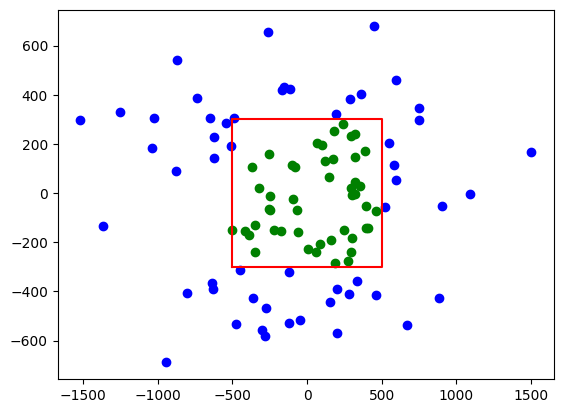

47 100
Accuracy :  47.0 %


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

length = 1000
height = 600

deviation_x = length / 2
deviation_y = height / 2

def getRNN():
    rnn = np.random.randn()
    return rnn

HIT = 0
N = 0

for i in range(100):
    x = getRNN() * deviation_x
    y = getRNN() * deviation_y
    N += 1
    if (x <= length/2 and x >= -length/2) and (y <= height/2 and y >= -height/2):
        HIT += 1
        plt.scatter(x,y,color = "green")
    else:
        plt.scatter(x,y,color = "blue")


area_x = [-500, 500, 500, -500, -500]
area_y = [-300, -300, 300, 300, -300]

plt.plot(area_x, area_y, color="red")
plt.show()

print(HIT, N)
print("Accuracy : ", (HIT / N) * 100, "%")